In [1]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
from crnn.dataset.crop import via_crop

with open('/datasets/chip/mincho100k_ori_gt.pkl', 'rb') as f:
    mincho_labels = pickle.load(f)
    
with open("/home/wangg/ocr/mynumber_test/id2char_std.pkl", "rb") as f:
    id2char = pickle.load(f)
    
char2id = {v: k for k, v in id2char.items()}
with open("/home/wangg/ocr/Hermes/text_source/half_to_full") as f:
    h2f = {l[0]: l[1] for l in [l.split() for l in f.readlines()]}

## Crop based on VIA labels

In [3]:
ori_folder = Path("/datasets/almex_insurance/img/")
ori_save = Path("/datasets/almex_insurance/crop/")
aug_folders = list(Path("/datasets/almex_insurance/").glob("img_*/"))
aug_save = [Path(str(p).replace("img", "crop")) for p in aug_folders]
# gts = via_crop("/datasets/almex_insurance/label.json", ori_folder, aug_folders, ori_save, aug_save, char2id, h2f)

In [4]:
# with open("/datasets/almex_insurance/chip_gt.pkl", "wb") as f:
#     gts = pickle.dump(gts, f)

In [5]:
with open("/datasets/almex_insurance/chip_gt.pkl", "rb") as f:
    gts = pickle.load(f)

'保険者所在地'

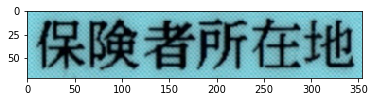

In [7]:
plt.imshow(plt.imread(f"/datasets/almex_insurance/crop/{gts[22][0]}"))
"".join([id2char[c] for c in gts[22][1]])

## Check existing synth data

In [8]:
with open("/datasets/chip/synth_labels.pkl", "rb") as f:
    synth_gts = pickle.load(f)

'年月日氏名日本郵'

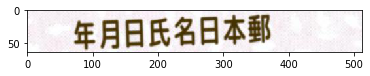

In [9]:
plt.imshow(plt.imread(synth_gts[22][0]))
"".join([id2char[c] for c in synth_gts[22][1]])

## Merge short textlines from VIA labels

In [10]:
from crnn.dataset.merge import merge

In [11]:
ori_folder = Path("/datasets/almex_insurance/crop/")
aug_folders = list(Path("/datasets/almex_insurance/").glob("crop_*/"))
img_folders = [ori_folder] + aug_folders
save_folders = [Path(str(p).replace("crop", "combined")) for p in img_folders]

In [12]:
# merged_gt = merge(gts, 13, img_folders=img_folders, save_folders=save_folders, ori_folder=ori_folder)

In [13]:
# with open("/datasets/almex_insurance/combined13_gt.pkl", "wb") as f:
#     pickle.dump(merged_gt, f)

## Check merged textlines

In [14]:
with open("/datasets/almex_insurance/combined13_gt.pkl", "rb") as f:
    merged_gt = pickle.load(f)

In [ ]:
from crnn.dataset.augment import blur, b53d2, elastic, augment_folder

# for folder in save_folders:
#     augment_folder(folder, lambda x: blur(x, 5), "blur5")
#     augment_folder(folder, lambda x: blur(x, 7), "blur7")
#     augment_folder(folder, b53d2, "b53d2")
#     augment_folder(folder, elastic, "elastic")